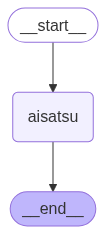

In [ ]:
from typing import Annotated, Optional, Dict, TypedDict
from datetime import date
from langgraph.graph import StateGraph, START, END

# STEP 1 - Create Agent State using a class of type TypedDict

# STEP 2(a) - Create a node, which is be a normal Python function with the state as both input argument and return value
# STEP 2(b) - Add a docstring to the node, whose purpose is basically to describe to the AI agent what this node is supposed to do
# NODE is just a function which takes the current state as input, updates it, and returns the updated state

# STEP 3(a) - Use "StateGraph" to build your graph using the state schema defined in step 1
# STEP 3(b) - Add nodes to your graph using the "add_node" function, and then add edges to your graph using the "add_edges" function 

# STEP 4 - Once all the nodes and edges of the graph have been defined, compile the graph into a "app" variable

# STEP 5 - Use app.invoke() with a starting state to actually run the graph, and store the result state in a variable

class AgentState(TypedDict):
    tday: str
    tdate: date
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state['message'] = 'Hey! How are you doing on this blessed day of ' + state['tdate'] + ', ' + state['tday'] +'?'
    return state

graph = StateGraph(AgentState)

graph.add_node("aisatsu", greeting_node)
graph.add_edge(START, "aisatsu")
graph.add_edge("aisatsu", END)

app = graph.compile()


from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"tday":"Tuesday", "tdate":"2025/06/02"})
result["message"]

'Hey! How are you doing on this blessed day of 2025/06/02, Tuesday?'

H1.PRACTICESET2

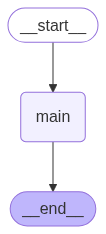

In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    message: str

def compliment_node(state: AgentState) -> AgentState:
    """This will take the users name as context and give them a compliment"""
    state["message"] = f"Wow {state['message']}, that is a great name!"
    return state

graph = StateGraph(AgentState)

graph.add_node("main", compliment_node)
graph.add_edge(START, "main")
graph.add_edge("main", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result = app.invoke({"message": "Aditya"})
result["message"]

'Wow Aditya, that is a great name!'

GRAPH 2 - MULTIPLE INPUTS

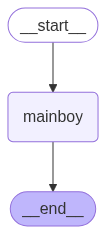

In [16]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

def process_values(state: AgentState) -> AgentState:
    """This function handles multiple input values"""
    state["result"] = f"Hi buddy {state['name']}! Your sum is : {sum(state['values'])}"

    return state

graph = StateGraph(AgentState)
graph.add_node("mainboy", process_values)
graph.add_edge(START, "mainboy")
graph.add_edge("mainboy", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"name":"Rogers", "values":[1, 2, 3, 4]})
result["result"]

'Hi buddy Rogers! Your sum is : 10'

SEQUENTIAL GRAPH TIMEEEE

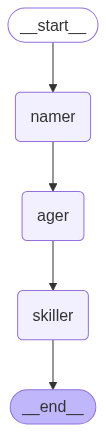

In [50]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    name: str
    age: int
    skills : List[str]
    result: str


def first_node(state: AgentState) -> AgentState:
    """This function tells the user their name"""
    state["result"] = f"Hi there, {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """This function tells the user their age"""
    state["result"] = f"{state['result']} That is a brilliant name for someone who is {state['age']} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    """This functions lists out all of the user's skills"""
    print(state["skills"][0])
    state["result"] = state['result'] + f" You have told me you are skilled at {state['skills']}?"
    return state

graph = StateGraph(AgentState)

graph.add_node("namer", first_node)
graph.add_node("ager", second_node)
graph.add_node("skiller", third_node)

graph.add_edge(START, "namer")
graph.add_edge("namer", "ager")
graph.add_edge("ager",  "skiller")
graph.add_edge("skiller", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [51]:
result = app.invoke({"name":"Maheshwari", "age" : 10, "skills": ["Python", "Procrastination", "Protesting"]})
result["result"]

Python


"Hi there, Maheshwari! That is a brilliant name for someone who is 10 years old! You have told me you are skilled at ['Python', 'Procrastination', 'Protesting']?"

<h1> CONDITIONAL GRAPH TIME WOOOO (Finally introduces routers and add_conditional_edges())

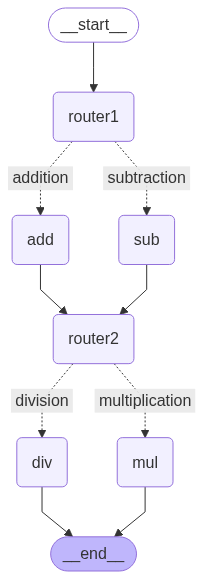

In [70]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


# STEP 1 - Create Agent State using a class of type TypedDict

# STEP 2(a) - Create a node, which is be a normal Python function with the state as both input argument and return value
# STEP 2(b) - Add a docstring to the node, whose purpose is basically to describe to the AI agent what this node is supposed to do
# NODE is just a function which takes the current state as input, updates it, and returns the updated state

# STEP 2(c) -- Define a router function which defines the conditions at which a node will be executed. THIS WILL RETURN THE EDGE NAME WHICH HAS TO BE FOLLOWED


# STEP 3(a) - Use "StateGraph" to build your graph using the state schema defined in step 1
# STEP 3(b) - Add nodes to your graph using the "add_node" function, and then add edges to your graph using the "add_edges" function 

# STEP 3(c)(i) -- The router function IS NOT ADDED as a node. Instead a "router" node is added with the lamda state:state function for reasons explained below
# STEP 3(c)(ii) -- Then, the add_conditional_edges function is used, which takes 3 inputs :
#                           the router node name (as specified in step 3(c)(i)),
#                           the router function name (as defined in step 2(c)), and
#                           a Edge Name: Node Name map (where edge names are the return values for router function and node names are specified in step 3(b))

# STEP 4 - Once all the nodes and edges of the graph have been defined, compile the graph into a "app" variable

# STEP 5 - Use app.invoke() with a starting state to actually run the graph, and store the result state in a variable



class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation: str
    operation2: str
    final : int
    final2 : int

def adder_node(state: AgentState) -> AgentState:
    """This function adds the 2 numbers"""
    state['final'] = state['num1'] + state['num2']
    return state

def sub_node(state: AgentState) -> AgentState:
    """This function subtracts num2 from num1"""
    state['final'] = state['num1'] - state['num2']
    return state

def mul_node(state: AgentState) -> AgentState:
    """This function multiplies the 2 numbers"""
    state['final2'] = state['num1'] * state['num2']
    return state

def div_node(state: AgentState) -> AgentState:
    """This function divides num2 from num1"""
    state['final2'] = state['num1'] / state['num2']
    return state

def router_node1(state: AgentState) -> AgentState:
    """This node will define what is the graph should next add or subtract"""

    if state['operation'] == '+':
        return "addition"
    elif state['operation'] == '-':
        return "subtraction"

def router_node2(state: AgentState) -> AgentState:
    """This node will define if the graph should next multiply or divide"""
    if state['operation2'] == '*':
        return "multiplication"
    elif state['operation2'] == '/':
        return "division"

graph = StateGraph(AgentState)

graph.add_node("router1", lambda state:state) #passthrough function (because the router does not actually change the state, it just guides the graph to the node that will change the state, hence, at the router node, the STATE REMAINS UNCHANGED)
graph.add_node("router2", lambda state:state)
graph.add_node("add", adder_node)
graph.add_node("sub", sub_node)
graph.add_node("mul", mul_node)
graph.add_node("div", div_node)


graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    router_node1,
    {
        "addition": "add", 
        "subtraction": "sub"
    }

)

graph.add_edge("add", "router2")
graph.add_edge("sub", "router2")

graph.add_conditional_edges(
    "router2",
    router_node2,
    {
        "multiplication":"mul",
        "division": "div"
    }
)
graph.add_edge("mul", END)
graph.add_edge("div", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [71]:
res1 = app.invoke({"num1":10, "num2": 2, "operation":"+", "operation2":"*"})
print(res1['final'])
print(res1['final2'])

12
20


In [73]:
res2 = app.invoke({"num1":10, "num2": 2, "operation":"+", "operation2":"/"})
print(res2['final'])
print(res2['final2'])

12
5.0


In [74]:
res3 = app.invoke({"num1":10, "num2": 2, "operation":"-", "operation2":"*"})
print(res3['final'])
print(res3['final2'])

8
20


In [75]:
res4 = app.invoke({"num1":10, "num2": 2, "operation":"-", "operation2":"/"})
print(res4['final'])
print(res4['final2'])

8
5.0


<h1> LOOPING GRAPH TIME WOOOOO

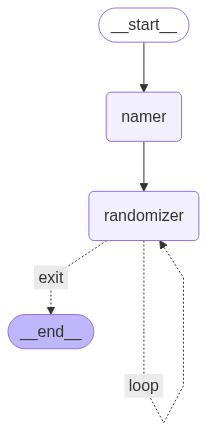

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4
{'name': 'Bobby Brown', 'number': [10, 4, 9, 6, 6], 'counter': 5, 'message': 'You said your name was Bobby Brown, correct? Your lucky numbers are:'}


In [111]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    message: str

def name_node(state: AgentState) -> AgentState:
    """This function repeats the user's name back to them"""
    state['message'] = f"You said your name was {state['name']}, correct? Your lucky numbers are:"
    state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """This function generates a random number from 0 to 10"""
    state["number"].append(random.randint(0,10))
    state["counter"] += 1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Function which decides what to do next"""
    if state['counter'] < 5:
        print('ENTERING LOOP', state['counter'])
        return 'loop' # continue looping, conditional edge back onto itself
    else:
        return 'exit' # conditional edge towards end node
    
graph = StateGraph(AgentState)

graph.add_node("namer", name_node)
graph.add_node("randomizer", random_node)

graph.add_edge(START, "namer")
graph.add_edge("namer", "randomizer")

graph.add_conditional_edges(
    "randomizer",
    should_continue,
    {
        "loop" : "randomizer",
        "exit" : END
    }
)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

result = app.invoke({"name":"Bobby Brown", "counter": -1, "number":[]})
print(result)

<h1>GRAPH PRACTICE - HIGHER OR LOWER GAME~~

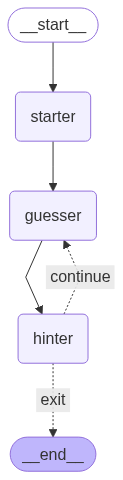

In [147]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    player_name: str
    attempts: int
    guesses: List[int]
    lower_bound: int
    upper_bound: int
    number: int

def setup_node(state: AgentState)-> AgentState:
    """This function sets up the parameters for the rest of the game"""
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['attempts'] = 0
    print(f"Welcome to the game show {state['player_name']}! I see that you have given us your secret number between 1 and 20. Let the AI begin to guess it now!\n")
    return state

def guess_node(state: AgentState) -> AgentState:
    """This function gives a random number guess based on current lower bound and upper bound"""
    
    print(f"New guessing region : from {state['lower_bound']} to {state['upper_bound']}")
    state['guesses'].append(random.randint(state['lower_bound'], state['upper_bound']))
    print(f"\nHmm.. The AI has guessed the number to be : {state['guesses'][-1]}")
    state['attempts']+=1
    return state

def hint_node(state: AgentState) -> AgentState:
    """This function will tell the agent if it is above the secret number or below the secret number"""
    
    if state['guesses'][-1] < state['number']:
        print('\nOOOO, looks like the AGENT HAS UNDERSHOT THIS TIME! Try AGAIN LIL BUDDY!')  
        state['lower_bound'] = state['guesses'][-1]+1
        return state
    elif state['guesses'][-1] > state['number']:
        print('\nHAHA, You seem to be aiming tooo high there lil bro. Try again!')
        state['upper_bound'] = state['guesses'][-1]-1
        return state

def should_continue(state: AgentState) -> AgentState:
    """This agent determines if the agent should continue guessing or the game should end"""
    if state['attempts'] > 7:
        print("\nLooks like the agent could not guesss it correctly afterr all. Till NEXT TIME FOLKS!!")
        return 'exit'
    elif state['guesses'][-1] == state['number']:
        print(f'\nTHE AGENT HAS GUESSED CORRECTLY!! And it took only {state['attempts']} attempts?!?! 7 CROREEE!!!')
        return 'exit'
    else:
        return 'continue'
    

graph = StateGraph(AgentState)

graph.add_node("starter", setup_node)
graph.add_node("guesser", guess_node)
graph.add_node("hinter",  hint_node)

graph.add_edge(START, "starter")
graph.add_edge("starter", "guesser")
graph.add_edge("guesser", "hinter")

graph.add_conditional_edges(
    "hinter",
    should_continue,
    {
        "continue" : "guesser",
        "exit" : END
    }
)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [148]:
result = app.invoke({"player_name":"Singham", "number":random.randint(1, 20), "guesses":[]})

Welcome to the game show Singham! I see that you have given us your secret number between 1 and 20. Let the AI begin to guess it now!

New guessing region : from 1 to 20

Hmm.. The AI has guessed the number to be : 11

OOOO, looks like the AGENT HAS UNDERSHOT THIS TIME! Try AGAIN LIL BUDDY!
New guessing region : from 12 to 20

Hmm.. The AI has guessed the number to be : 13

OOOO, looks like the AGENT HAS UNDERSHOT THIS TIME! Try AGAIN LIL BUDDY!
New guessing region : from 14 to 20

Hmm.. The AI has guessed the number to be : 16

OOOO, looks like the AGENT HAS UNDERSHOT THIS TIME! Try AGAIN LIL BUDDY!
New guessing region : from 17 to 20

Hmm.. The AI has guessed the number to be : 20

HAHA, You seem to be aiming tooo high there lil bro. Try again!
New guessing region : from 17 to 19

Hmm.. The AI has guessed the number to be : 19

THE AGENT HAS GUESSED CORRECTLY!! And it took only 5 attempts?!?! 7 CROREEE!!!
